## Understanding the file paths
For working with image files first of all we need to identify the path of those file. In my machine I stored my image data in the following directory ```E:\DeepLearning-Data\Malaria```

In [1]:
import os

In [2]:
data_dir = 'E:\DeepLearning-Data\Chest-Xray-Images'

### Train test folder 
We have two folder named train and test under Malaria folder. And inside the train folder we have two different folder for normal and indected sell same for test folder.

In [3]:
os.listdir(data_dir)

['Chest-Xray-Augmented',
 'Chest-Xray-Augmented.zip',
 'Chest-Xray-Resized',
 'Chest-Xray-Resized.zip']

In [4]:
data_dir = 'E:\DeepLearning-Data\Chest-Xray-Images\Chest-Xray-Augmented'

## Importing necessary libraries.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

### Here we are creating the train and test path. These are the file path for our train and test Data

In [6]:
train_path = data_dir+'\\train'
test_path = data_dir+'\\test'

In [7]:
os.listdir(train_path)

['NORMAL', 'PNEUMONIA']

In [10]:
os.listdir(train_path+'\\PNEUMONIA')[0]

'pneumonia10.png'

In [12]:
single_image = train_path+'\\PNEUMONIA\\pneumonia10.png'

In [13]:
infected_image = imread(single_image)
infected_image.shape

(256, 256, 3)

In [22]:
infected_image.min(), infected_image.max()

(0.0, 0.9882353)

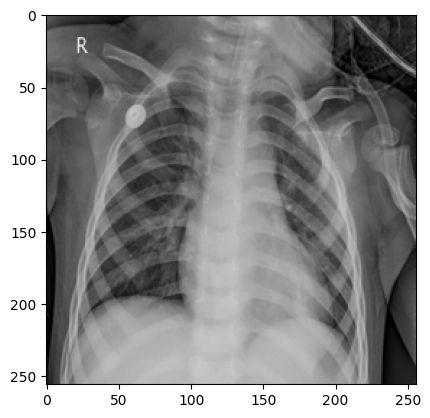

In [23]:
# this is an infected cell
plt.imshow(infected_image)
plt.show()

## Check the dimension of all the images in the test set

In [24]:
dim1 = []
dim2 = []
color = []
for image in os.listdir(test_path+'\\PNEUMONIA'):
    img = imread(test_path+'\\PNEUMONIA\\'+image)
    d1,d2,c = img.shape
    dim1.append(d1)
    dim2.append(d2)    
    color.append(c)    

### These are all the unique values for first dimension

In [25]:
# the mean of dim1 and dim2
print(np.mean(dim1))
print(np.mean(dim2))

256.0
256.0


In [26]:
# We will reshape all the image to this shape
# CNN requires all the image of same shape
image_shape = (128,128,3)

# Manipulate images

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
# this data set is already scaled. If not then we can use """rescale = 1/255""" 
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=.1,
                               zoom_range = .1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

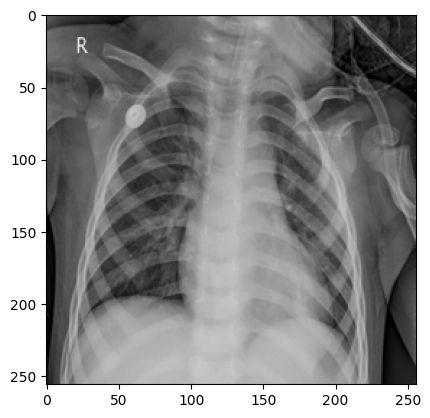

In [30]:
plt.imshow(infected_image)
plt.show()

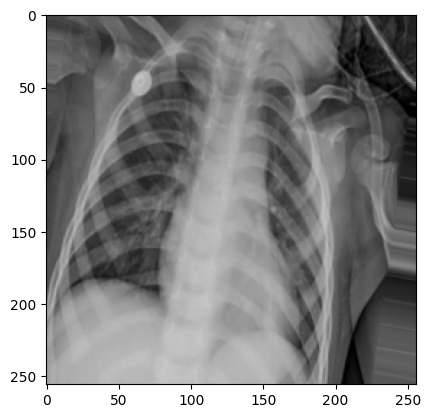

In [31]:
plt.imshow(image_gen.random_transform(infected_image))
plt.show()

In [32]:
image_gen.flow_from_directory(train_path)

Found 5965 images belonging to 2 classes.


In [33]:
image_gen.flow_from_directory(test_path)

Found 798 images belonging to 2 classes.


# Modeling

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [35]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# model.summary()

### Using a early stopping callback here
It will prevent overfitting. The validation loss will be monitored. 

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=4, mode='min')

In [39]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='binary')

Found 5965 images belonging to 2 classes.


In [40]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=16,
                                               class_mode='binary',
                                               shuffle=False)

Found 798 images belonging to 2 classes.


In [41]:
train_image_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [43]:
results = model.fit(train_image_gen, epochs=10,
                              validation_data = test_image_gen,
                              callbacks=[early_stop])

Epoch 1/10
373/373 [==============================] - 126s 334ms/step - loss: 1.0063 - accuracy: 0.7779 - val_loss: 0.4590 - val_accuracy: 0.7995
Epoch 2/10
373/373 [==============================] - 100s 268ms/step - loss: 0.4321 - accuracy: 0.8230 - val_loss: 0.4235 - val_accuracy: 0.8083
Epoch 3/10
373/373 [==============================] - 105s 281ms/step - loss: 0.4280 - accuracy: 0.8225 - val_loss: 0.4550 - val_accuracy: 0.8308
Epoch 4/10
373/373 [==============================] - 107s 286ms/step - loss: 0.4053 - accuracy: 0.8359 - val_loss: 0.4373 - val_accuracy: 0.8208
Epoch 5/10
373/373 [==============================] - 110s 296ms/step - loss: 0.3850 - accuracy: 0.8493 - val_loss: 0.3717 - val_accuracy: 0.8358
Epoch 6/10
373/373 [==============================] - 111s 298ms/step - loss: 0.3462 - accuracy: 0.8614 - val_loss: 0.3119 - val_accuracy: 0.8734
Epoch 7/10
373/373 [==============================] - 110s 295ms/step - loss: 0.3627 - accuracy: 0.8451 - val_loss: 0.3988 -

In [44]:
loss_df = pd.DataFrame(model.history.history)
loss_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [45]:
### Plot training loss vs validation loss

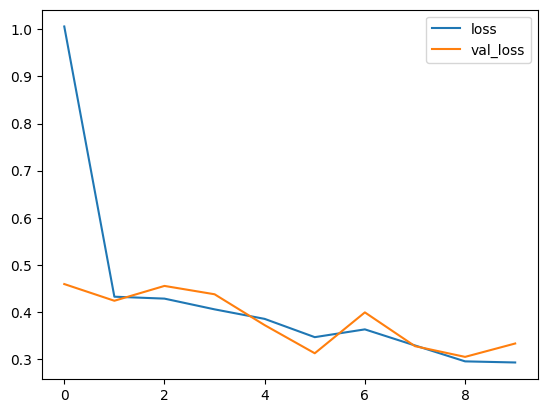

In [46]:
loss_df[['loss','val_loss']].plot()
plt.show()

### Plot training accuracy vs validation accuracy

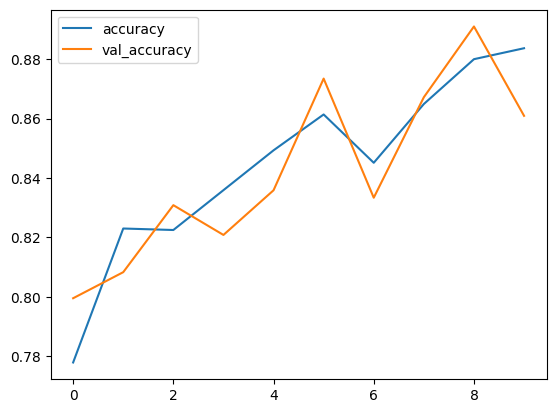

In [47]:
loss_df[['accuracy','val_accuracy']].plot()
plt.show()

## Evaluate the model performance on test set

In [48]:
model.evaluate(test_image_gen, verbose=0)

[0.3106391727924347, 0.8709273338317871]

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
y_pred = model.predict(test_image_gen)

50/50 [==============================] - 12s 244ms/step


In [51]:
y_pred = y_pred.round()

In [52]:
y_true = test_image_gen.classes

In [53]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       369
           1       0.92      0.81      0.86       429

    accuracy                           0.86       798
   macro avg       0.86      0.87      0.86       798
weighted avg       0.87      0.86      0.86       798



In [54]:
import seaborn as sns

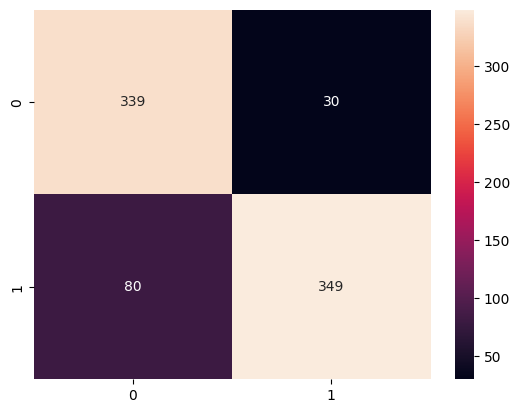

In [57]:
cnf = confusion_matrix(y_true,y_pred)
sns.heatmap(cnf, annot=True, fmt='g')
plt.show()

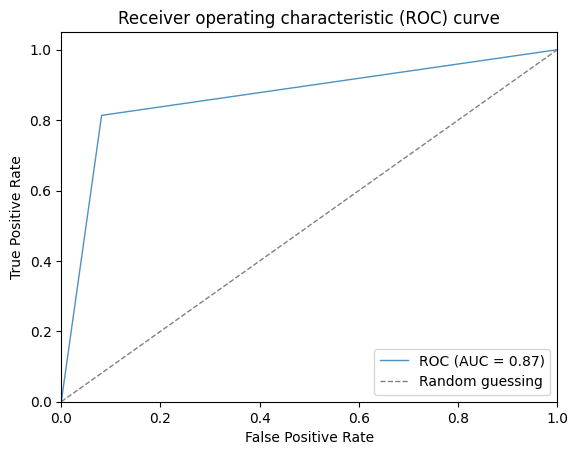

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()